### Treść zadania

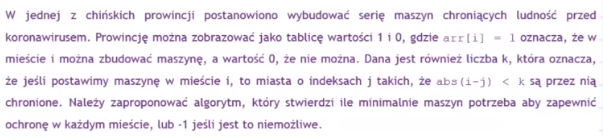

### Omówienie algorytmu

Za każdym razem celujemy najdalej jak możemy, wybierając miasto, które położone jest na takiej pozycji, że dokładnie po $ k - 1 $ nowych (wcześniej niechronionych) miast z obu stron miasta zostałoby ochronionych po umieszczeniu maszyny w tym miejscu. Jeżeli okaże się, że nie możemy tak daleko od razu umieścić maszyny, bo w danym mieście nie da się jej umieścić, musimy się cofnąć do poprzedniego miasta i sprawdzić, czy w nim można umieścić tę maszynę. Opisaną procedurę powtarzamy do chwili, w której znajdziemy miasto, w którym będzie się dało umieścić maszynę lub dojdziemy do miasta, w którym znajduje się poprzednio umieszczona przez nas maszyna (więc nie możemy już ochronić dalszych miast, bo nie dało się postawić dalej maszyny), wtedy koniecznie jest zwrócenie wartości -1. Oczywiście, po każdym postawieniu maszyny, zapamiętujemy indeks, na którym ją stawialiśmy, aby móc skorzystać z wcześniej opisanego porównania.

### Złożoność

$ O(n) $ - w najgorszym przypadku, bo zawsze skaczemy najdalej jak możemy, a więc na takie pole, dla którego umieszczenie w nim maszyny spowoduje objęcie ochroną dokładnie $ k - 1 $ niechronionych dotychczas pól przed nią oraz $ k - 1 $ pól za nią. Jeżeli okaże się, że w danym mieście nie da się postawić maszyny, cofamy się tylko dopóki jesteśmy na polach, na których nie ma postawionej żadnej maszyny, więc maksymalnie sprawdzimy każde pole dokładnie jeden raz.

### Implementacja

In [1]:
def protect(C: 'array of cities', k: 'max protected range by one machine'):
    n = len(C)
    
    count = 0
    i = k - 1
    j = -1
    while j < n - k:
        while i > j and not C[i]:
            i -= 1
        if i == j:
            return -1
        if C[i]:
            print('Added', i)
            count += 1
            j = i  # Store an index of the last machine placement
            i = min(i + 2 * k - 1, n - 1)   # Jump the farthest we can
    return count

###### Kilka testów

In [2]:
cities = [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
k = 3

print(protect(cities, k))

Added 2
Added 5
Added 10
Added 13
4


In [3]:
cities = [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
k = 3

print(protect(cities, k))

Added 2
Added 5
Added 10
3


In [4]:
cities = [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
k = 3

print(protect(cities, k))

Added 2
Added 5
Added 10
Added 11
-1


In [5]:
cities = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
k = 3

print(protect(cities, k))

Added 2
Added 6
Added 9
Added 14
-1
